https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv('temps.csv')
df.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


### 2. Lidia con las variables categóricas del dataset

In [4]:
df = pd.get_dummies(df)
df

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,2016,12,27,42,42,45.2,47,41,50,47,47,0,0,0,0,0,1,0
344,2016,12,28,42,47,45.3,48,41,49,44,58,0,0,0,0,0,0,1
345,2016,12,29,47,48,45.3,48,43,50,45,65,0,0,0,0,1,0,0
346,2016,12,30,48,48,45.4,57,44,46,44,42,1,0,0,0,0,0,0


### 3. Divide en train y test

In [5]:
# entrenamiento del modelo 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedKFold 
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import tree

# 1. Definir X e y
X = np.array(df.drop(columns=['actual'])) # se elige toda la tabla menos 
y = np.array(df["actual"])

# 2. Dividir X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle= True, test_size = 0.20, random_state = 42)

### 4. Entrena el modelo
Utiliza un DecisionTreeRegressor

In [6]:
#model = DecisionTreeRegressor(n_estimators=2000,oob_score=True,bootstrap=True,max_features=4,min_samples_split=10,min_samples_leaf=2)
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

### 5. Calcula su MAE
Sin usar sklearn

In [7]:
predictions = model.predict(X_test)
print('predicciones test:\n', predictions)
print('score (MAE) de las predicciones:', metrics.mean_absolute_error(y_test, predictions))

predicciones test:
 [77. 60. 52. 68. 72. 77. 73. 73. 68. 65. 62. 67. 39. 68. 68. 55. 59. 57.
 57. 75. 63. 55. 68. 55. 64. 48. 71. 45. 60. 82. 71. 68. 57. 90. 73. 60.
 54. 57. 67. 40. 77. 59. 81. 39. 58. 85. 57. 85. 51. 44. 40. 43. 64. 66.
 71. 60. 55. 64. 51. 60. 60. 51. 59. 71. 60. 57. 76. 68. 80. 40.]
score (MAE) de las predicciones: 4.9714285714285715


### 6. Calcula su MAPE
Sin usar sklearn

In [8]:
print('predicciones test:\n', predictions)
print('score (MAPE) de las predicciones:', metrics.mean_absolute_percentage_error(y_test, predictions))

predicciones test:
 [77. 60. 52. 68. 72. 77. 73. 73. 68. 65. 62. 67. 39. 68. 68. 55. 59. 57.
 57. 75. 63. 55. 68. 55. 64. 48. 71. 45. 60. 82. 71. 68. 57. 90. 73. 60.
 54. 57. 67. 40. 77. 59. 81. 39. 58. 85. 57. 85. 51. 44. 40. 43. 64. 66.
 71. 60. 55. 64. 51. 60. 60. 51. 59. 71. 60. 57. 76. 68. 80. 40.]
score (MAPE) de las predicciones: 0.07911958248569495


### 7. Representa el árbol de decision

In [9]:
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_4 <= 59.50
|   |--- feature_5 <= 46.85
|   |   |--- feature_4 <= 44.50
|   |   |   |--- feature_6 <= 42.50
|   |   |   |   |--- feature_9 <= 46.50
|   |   |   |   |   |--- feature_8 <= 46.50
|   |   |   |   |   |   |--- feature_7 <= 48.00
|   |   |   |   |   |   |   |--- value: [40.00]
|   |   |   |   |   |   |--- feature_7 >  48.00
|   |   |   |   |   |   |   |--- value: [42.00]
|   |   |   |   |   |--- feature_8 >  46.50
|   |   |   |   |   |   |--- value: [44.00]
|   |   |   |   |--- feature_9 >  46.50
|   |   |   |   |   |--- feature_7 <= 48.00
|   |   |   |   |   |   |--- value: [46.00]
|   |   |   |   |   |--- feature_7 >  48.00
|   |   |   |   |   |   |--- value: [47.00]
|   |   |   |--- feature_6 >  42.50
|   |   |   |   |--- feature_3 <= 39.50
|   |   |   |   |   |--- feature_9 <= 37.00
|   |   |   |   |   |   |--- value: [39.00]
|   |   |   |   |   |--- feature_9 >  37.00
|   |   |   |   |   |   |--- value: [35.00]
|   |   |   |   |--- feature_3 >  39.50
|   |   

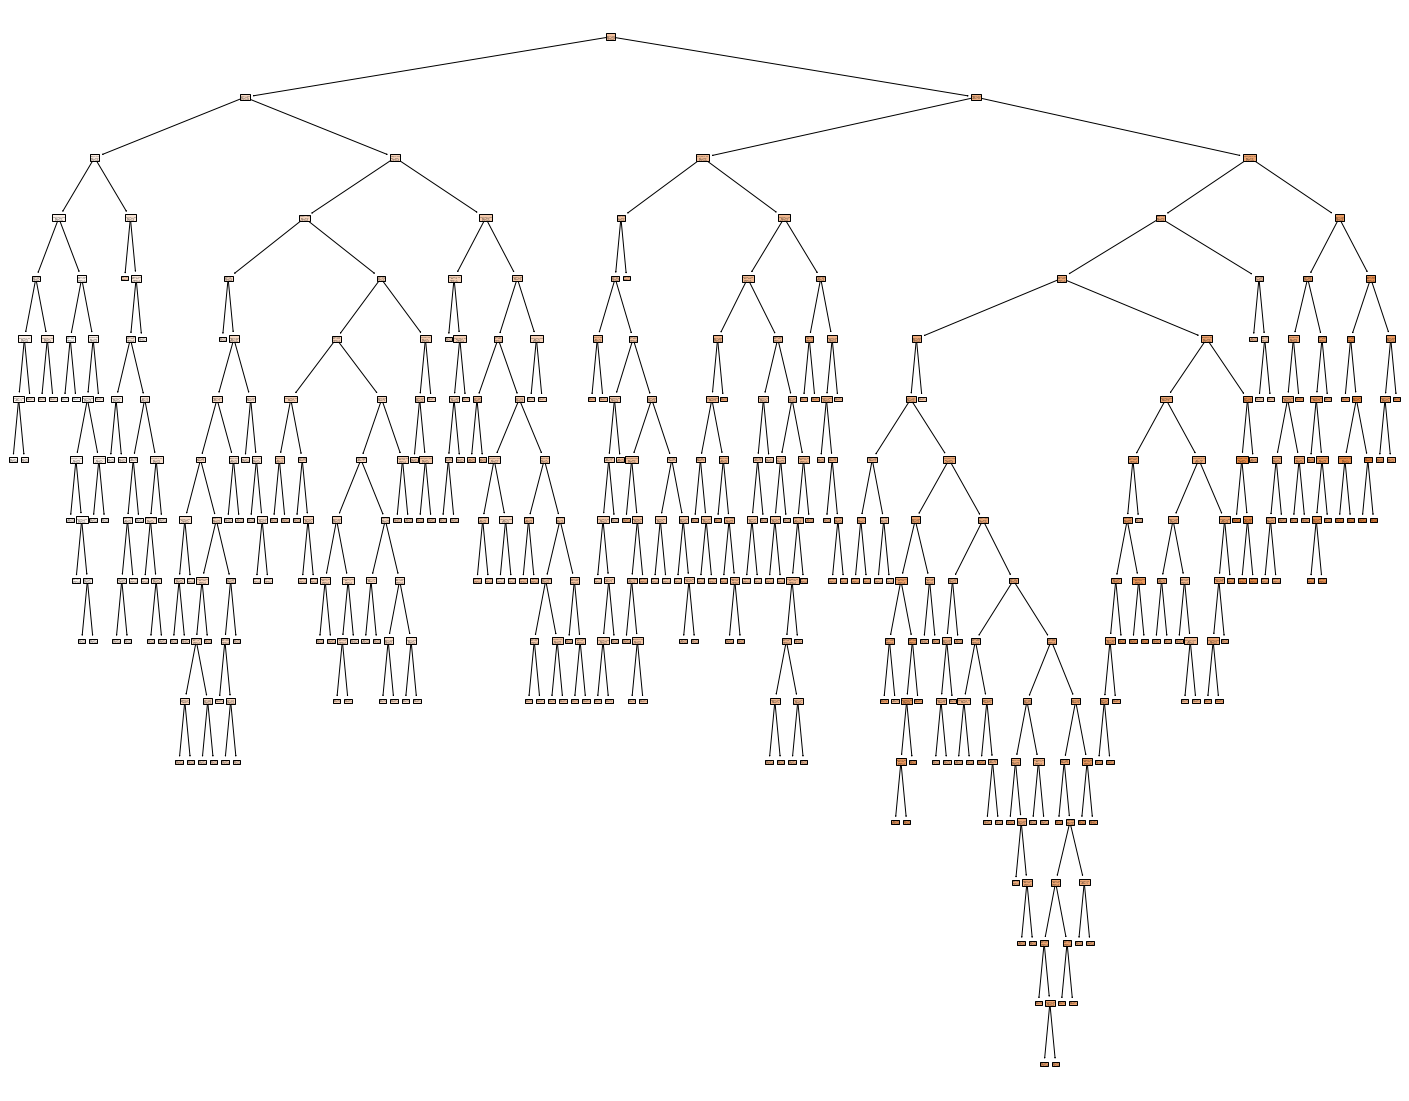

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'week_Fri','week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues','week_Wed'],  
                   class_names=['actual'],
                   filled=True)

### 8. Modifica el max_depth a 3 y vuelve a entrenarlo

In [11]:
model3 = DecisionTreeRegressor(max_depth=3)
model3.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

### 9. Vuelve a calcular si MAE

In [14]:
predictions3 = model3.predict(X_test)
print('predicciones test:\n', predictions3)
print('score (MAE) de las predicciones:', metrics.mean_absolute_error(y_test, predictions3))
print('score (MAPE) de las predicciones:', metrics.mean_absolute_percentage_error(y_test, predictions3))

predicciones test:
 [72.61842105 61.37037037 52.44444444 66.08333333 66.08333333 72.61842105
 72.61842105 72.61842105 61.37037037 72.61842105 61.37037037 72.61842105
 41.05882353 61.37037037 72.61842105 58.13333333 61.37037037 52.44444444
 58.13333333 72.61842105 66.08333333 58.13333333 66.08333333 61.37037037
 58.13333333 52.44444444 66.08333333 46.         58.13333333 78.7826087
 72.61842105 66.08333333 58.13333333 78.7826087  78.7826087  61.37037037
 52.44444444 52.44444444 72.61842105 46.         72.61842105 52.44444444
 72.61842105 41.05882353 61.37037037 72.61842105 52.44444444 78.7826087
 52.44444444 41.05882353 46.         41.05882353 66.08333333 66.08333333
 72.61842105 61.37037037 58.13333333 58.13333333 52.44444444 58.13333333
 66.08333333 52.44444444 61.37037037 72.61842105 61.37037037 58.13333333
 72.61842105 72.61842105 78.7826087  41.05882353]
score (MAE) de las predicciones: 4.424444494299118
score (MAPE) de las predicciones: 0.06938377135428464


### 10. Vuelve a representar su árbol

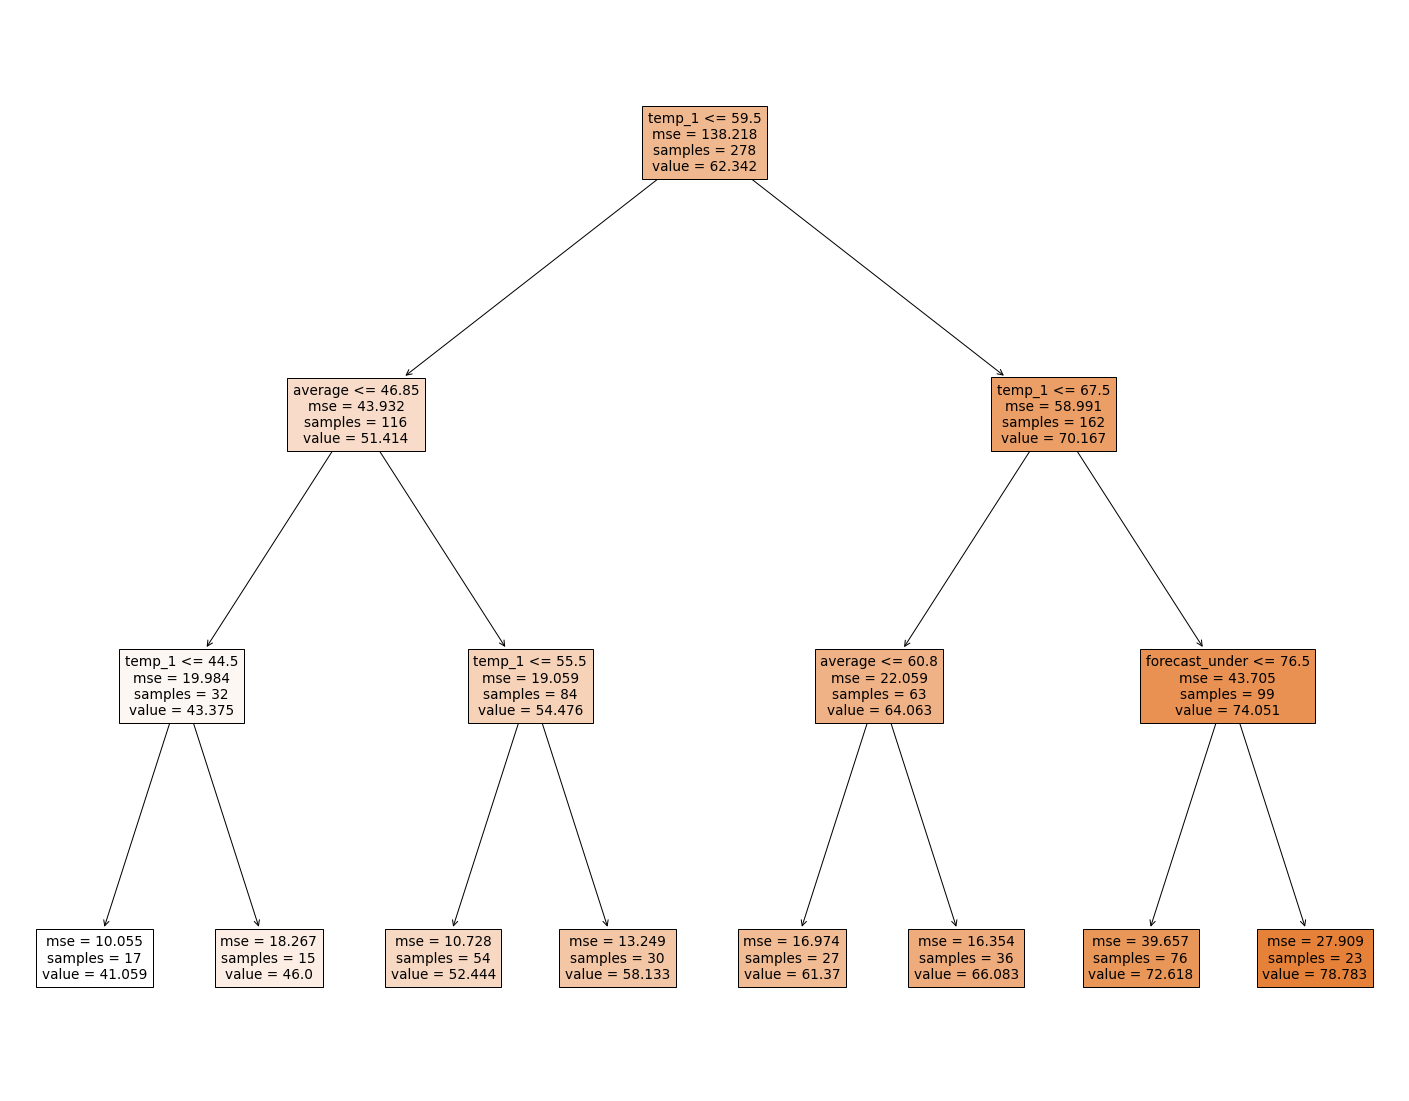

In [15]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model3, 
                   feature_names=['year', 'month', 'day', 'temp_2', 'temp_1', 'average', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'week_Fri','week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues','week_Wed'],  
                   class_names=['actual'],
                   filled=True)

### 10. Obten el `feature_importances` de cada variable en el último modelo

In [16]:
df3 = df.drop(columns='actual')
feature_list = list(df3.columns)
# Get numerical feature importances
importances = list(model3.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: temp_1               Importance: 0.88
Variable: average              Importance: 0.1
Variable: forecast_under       Importance: 0.02
Variable: year                 Importance: 0.0
Variable: month                Importance: 0.0
Variable: day                  Importance: 0.0
Variable: temp_2               Importance: 0.0
Variable: forecast_noaa        Importance: 0.0
Variable: forecast_acc         Importance: 0.0
Variable: friend               Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thurs           Importance: 0.0
Variable: week_Tues            Importance: 0.0
Variable: week_Wed             Importance: 0.0
